# **AIN 214 - PA4 - FALL 2025**

**Student Number** : 2240765020

**Name Surname**   : Sude Gündüz

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.12.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

**!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**

## **Part 1. Classification (50p)**

## Dataset: Airline Passenger Satisfaction

```Data/airline/train.csv```

| Variable | Description |
|----------|-------------|
| `Gender` | Gender of the passengers (Female, Male) |
| `Customer_Type` | The customer type (Loyal customer, disloyal customer) |
| `Age` | The actual age of the passengers |
| `Type_of_Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| `Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| `Flight_Distance` | The flight distance of this journey |
| `Inflight_wifi_service` | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| `Departure/Arrival_time_convenient` |  Satisfaction level of Departure/Arrival time convenient |
| `Ease_of_Online_booking` | Satisfaction level of online booking |
| `Gate_location` | Satisfaction level of Gate location |
| `Food_and_drink` | Satisfaction level of Food and drink |
| `Online_boarding` | Satisfaction level of online boarding |
| `Seat_comfort` | Satisfaction level of Seat comfort |
| `Inflight_entertainment` | Satisfaction level of inflight entertainment |
| `On-board_service` | Satisfaction level of On-board service |
| `Leg_room_service` | Satisfaction level of Leg room service |
| `Baggage_handling` | Satisfaction level of baggage handling |
| `Checkin_service` | Satisfaction level of Check-in service |
| `Inflight_service` | Satisfaction level of inflight service |
| `Cleanliness` | Satisfaction level of Cleanliness |
| `Departure_Delay_in_Minutes` | Minutes delayed when departure |
| `Arrival_Delay_in_Minutes` | Minutes delayed when Arrival |
| `satisfaction` | Airline satisfaction level(1: Satisfaction, 0: neutral or dissatisfaction) |


### Q1. Data Understanding & Preprocessing (20p)
- Import data from csv files into pandas DataFrame.
- Identify the features and the target variable.

In [89]:
# implementation here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

airline_df = pd.read_csv("Data/airline/train.csv")
target = airline_df["satisfaction"]  # target variable
features = airline_df.drop(columns=["satisfaction"])   # feature variables

#### Q1.1. Exploratory Data Analysis (10p)
- Check class distribution of the target variable.
- Identify missing values.
- Identify categorical vs numerical values.
- Visaualize the distribution of feautures and the target.
- Analyze the relationship between features and the target variable.
- Plot a correlation heatmap to analyze their relationships.
- Comment on any findings.

In [90]:
# implementation here

# class distribution of satisfaction in percentage
print(target.value_counts(normalize=True)*100)
print()

# missing values per column
print("Missing Values per Column:")
missing_values=airline_df.isnull().sum()
print(missing_values[missing_values>0])
print()

# categorical and numerical values
cat_cols = features.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = features.select_dtypes(include=["int64", "float64"]).columns
print("Categorical:", cat_cols)
print("Numerical:", num_cols)

satisfaction
0    56.666731
1    43.333269
Name: proportion, dtype: float64

Missing Values per Column:
Arrival_Delay_in_Minutes    310
dtype: int64

Categorical: Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')
Numerical: Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')


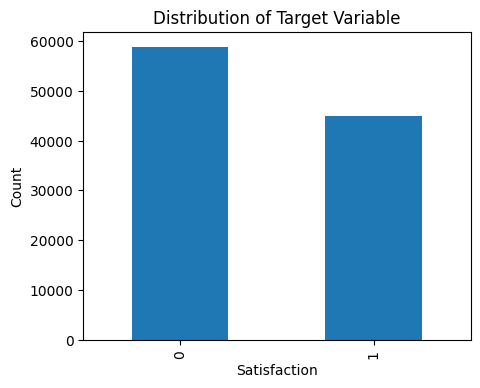

In [91]:
# visualization of target variable
plt.figure(figsize=(5, 4))
airline_df["satisfaction"].value_counts().plot(kind="bar")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

The bar chart shows a relatively **balanced distribution** of the target variable, with the "0" category (unsatisfied) appearing slightly more frequently than the "1" category (satisfied).

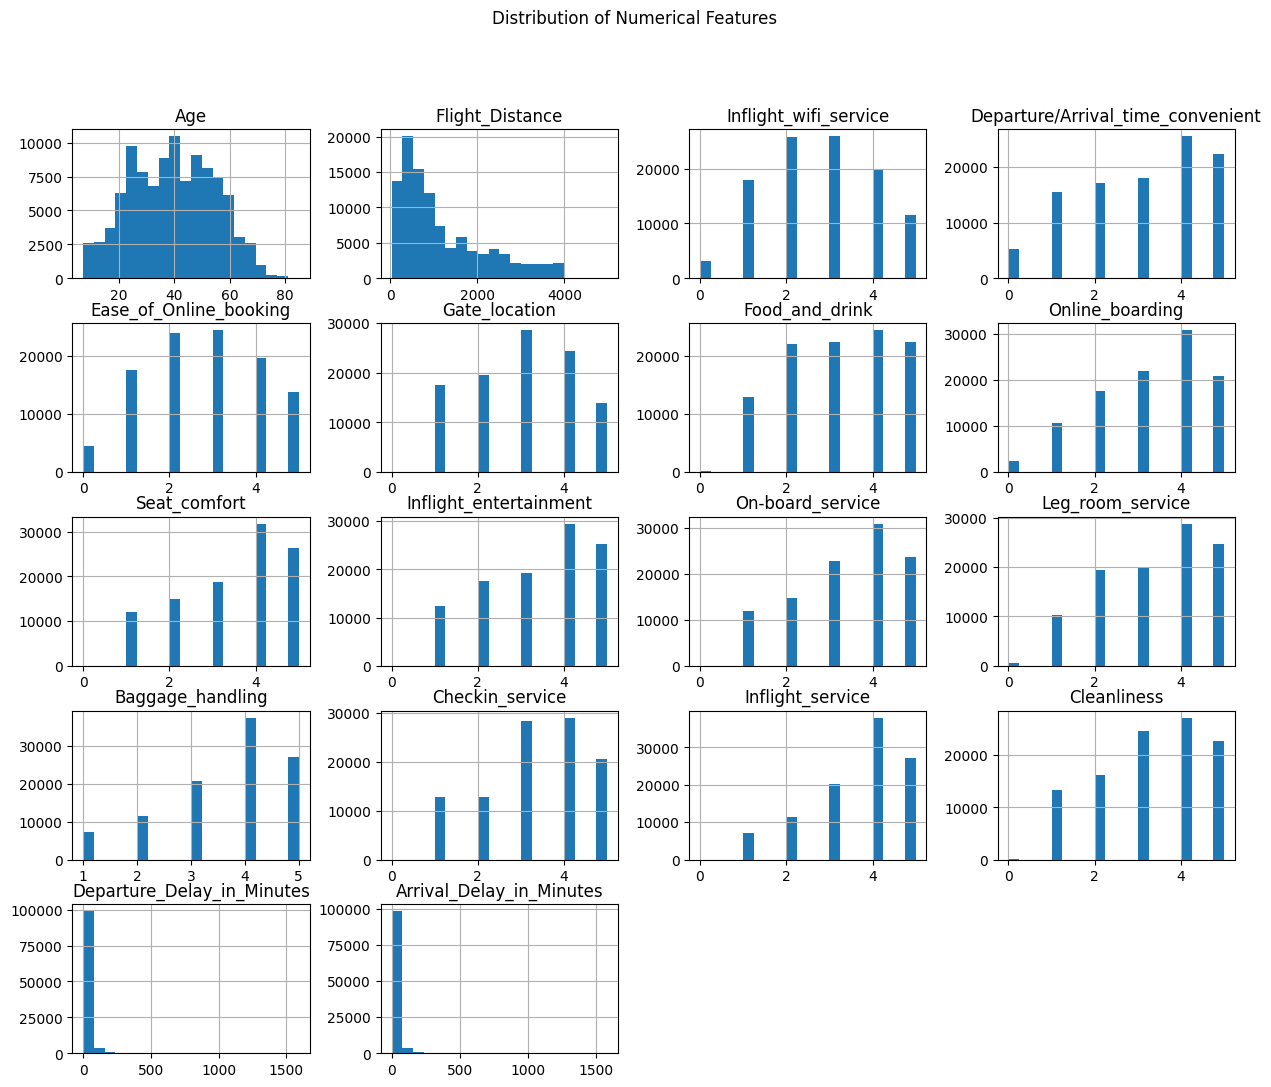

In [92]:
# visualization of numeriacal features
airline_df[num_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

Age appears ***normally distributed***, while flight distance is ***right-skewed***. Delay-related variables are ***heavily right-skewed*** with most flights having little or no delay. Most service-related ratings are ***skewed toward higher values***, indicating generally positive passenger experiences.

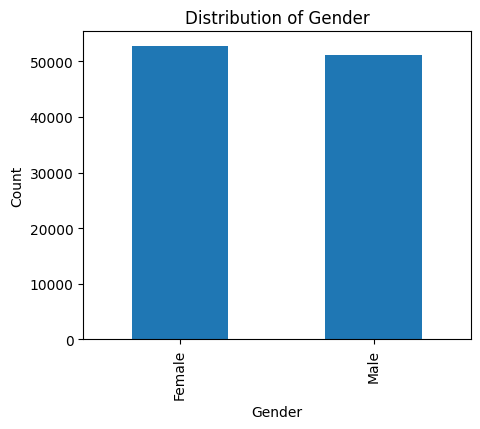

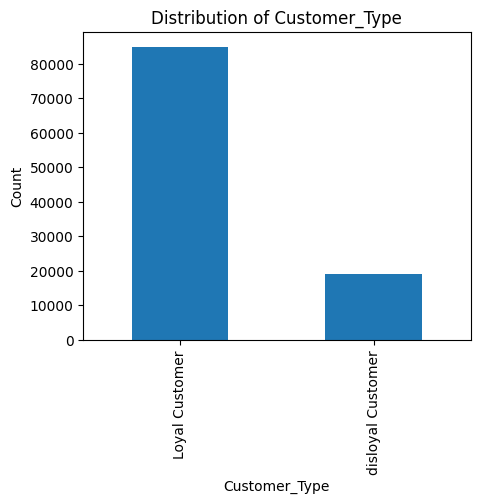

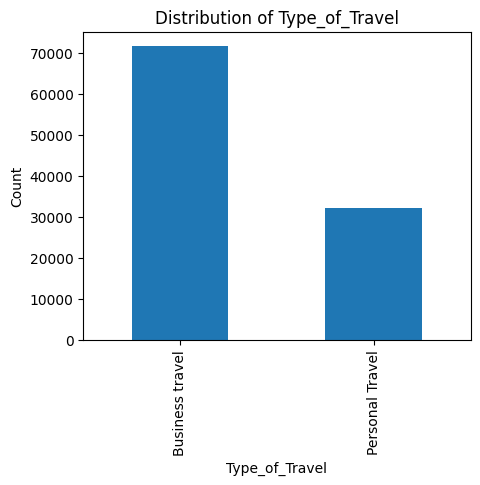

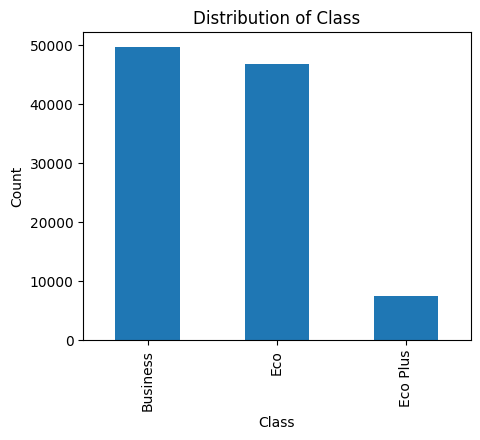

In [93]:
#visualization of categorical variables
for col in cat_cols:
    plt.figure(figsize=(5, 4))
    airline_df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

1. The distribution of gender is almost **perfectly balanced**.
2. There is a significant **imbalance** in customer type, with "Loyal Customers" outnumbering "disloyal" ones.
3. The majority of passengers are traveling for **Business** rather than personal reasons.
4. The majority of passengers seated in **Business or Eco class**, with Eco Plus representing only a small fraction of the total.

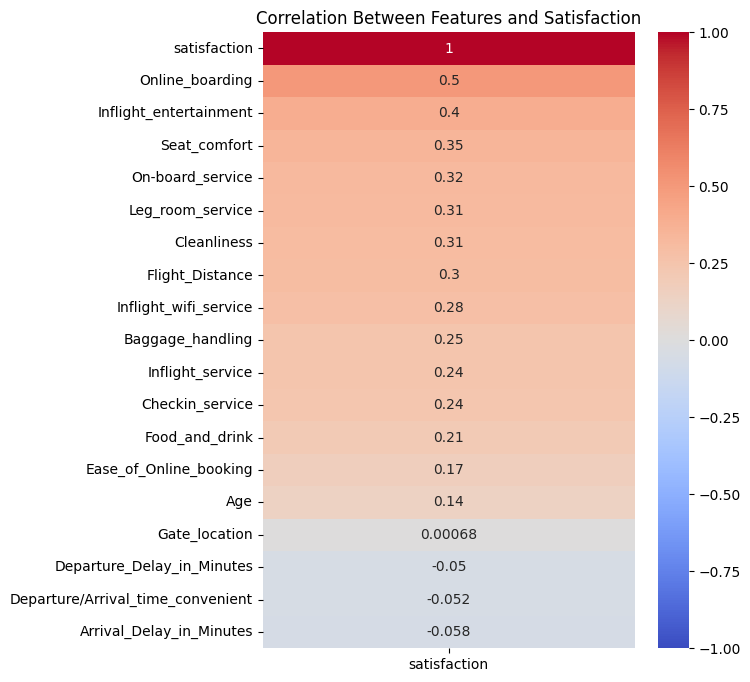

In [94]:
# plotting the heatmap between satisfaction and features
corr_df = airline_df[list(num_cols) + ["satisfaction"]]
corr_matrix = corr_df.corr()
plt.figure(figsize=(6, 8))
sns.heatmap(
    corr_matrix[["satisfaction"]].sort_values(by="satisfaction", ascending=False),
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Between Features and Satisfaction")
plt.show()

Satisfaction is most strongly correlated with service quality features-especially ***online boarding***, ***inflight entertainment***, and ***seat comfort***—indicating that passenger experience drives overall satisfaction. Delay-related variables show weak negative correlations, suggesting delays slightly reduce satisfaction but are less influential than service factors.

#### Q1.2. Data Preprocessing (10p)
- Drop unnecessary columns.
- Encode categorical variables appropriately (e.g. One-Hot Encoding)
- Handle missing values with the best fitting strategy. (impute)
- Normalize or standardize numerical features.

In [95]:
# implementation here

# dropping unnecessary columns
cols_to_drop = [
    "Gate_location", # it has nearly zero correlation with satisfaction
    "Arrival_Delay_in_Minutes" # it is redundant with Departure_Delay
]
airline_df = airline_df.drop(columns=cols_to_drop)
num_cols = num_cols.drop(cols_to_drop)

# one-hot encoding
gender_ranks = {
    "Male" : 0,
    "Female" : 1
}
# encoding gender column
airline_df["Gender_encoded"] = airline_df["Gender"].map(gender_ranks)

customer_type_ranks = {
    "disloyal Customer" : 0,
    "Loyal Customer" : 1
}
# encoding customer_type column
airline_df["Customer_Type_encoded"] = airline_df["Customer_Type"].map(customer_type_ranks)

type_of_travel_ranks = {
    "Personal Travel" : 0,
    "Business travel" : 1
}
# encoding type_of_travel column
airline_df["Type_of_Travel_encoded"] = airline_df["Type_of_Travel"].map(type_of_travel_ranks)

class_ranks = {
    "Eco" : 0,
    "Eco Plus" : 1,
    "Business" : 2
}
# encoding class column
airline_df["Class_encoded"] = airline_df["Class"].map(class_ranks)


# imputing the missing values in numerical columns with median
for col in num_cols:
    median_value = airline_df[col].median()
    airline_df[col] = airline_df[col].fillna(median_value)

# imputing the missing values in categorical columns with mode
for col in cat_cols:
    mode_value = airline_df[col].mode()[0]
    airline_df[col] = airline_df[col].fillna(mode_value)


# standardize numerical columns
airline_df[num_cols] = (airline_df[num_cols] - airline_df[num_cols].mean()) / airline_df[num_cols].std()


I dropped ***"Gate_location", "Arrival_Delay_in_Minutes"*** columns. Because gate_location has nearly ***zero correlation*** with satisfaction, so it is not influential. And arrival_delay_in_minutes is ***redundant*** with departure_delay_in_minutes column so it is unneseccary to keep both of them.

For handling missing values I choose ***imputing***. Because it preserves data and statistical power by avoiding the loss of entire rows that occurs with deletion.

### Q2. Classification Model Training & Evaluation (20p)
- Convert categorical features to numerical.
- Shuffle and split the data into train (80%) and validation (20%) sets. Do not use built-in or library functions (such as ```train_test_split``` from scikit-learn).

In [96]:
# implementation here

airline_df = airline_df.drop(columns=cat_cols)
df_encoded = airline_df.copy()

# shuffle
np.random.seed(42)
indices = np.random.permutation(len(df_encoded))
train_size = int(0.8 * len(indices))
# splitting the dataset
train_idx = indices[:train_size]
test_idx  = indices[train_size:]
train_df = df_encoded.iloc[train_idx].reset_index(drop=True)
test_df  = df_encoded.iloc[test_idx].reset_index(drop=True)

#### Q2.1. Train Models (10p)
- Train at least two classification models. (kNN, Decision Tree, etc.)
- One have to be Logistic Regression.

In [97]:
# implementation here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x_train = train_df.drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]

x_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

# model1: logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

pred_lr = log_reg.predict(x_test)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
 
# model2: kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)

In [99]:
from sklearn.tree import DecisionTreeClassifier

# model3: decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

pred_dt = dt.predict(x_test)

#### Q2.2 Evaluate Model Performance (10p)
Evaluate the model's performance with;
- Accuracy
- Confusion Matrix
- Precision, recall and F1-score

Report metrics and write a short comment about the results.

- Which model performs better?
- Which types of errors are more frequent? (FP vs FN)

In [100]:
# implementation here
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# model1: logistic regression
acc_lr = accuracy_score(y_test, pred_lr)
cm_lr = confusion_matrix(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

print("Logistic Regression Results")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", rec_lr)
print("F1-score:", f1_lr)
print("Confusion Matrix:\n", cm_lr)
print("\nClassification Report of Logistic Regression")
print(classification_report(y_test, pred_lr))

TN, FP, FN, TP = cm_lr.ravel()
print("False Positives:", FP)
print("False Negatives:", FN)


Logistic Regression Results
Accuracy: 0.8760406140224243
Precision: 0.871499176276771
Recall: 0.8330708661417323
F1-score: 0.8518518518518519
Confusion Matrix:
 [[10799  1092]
 [ 1484  7406]]

Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11891
           1       0.87      0.83      0.85      8890

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

False Positives: 1092
False Negatives: 1484


In [101]:
# model2: kNN
acc_knn = accuracy_score(y_test, pred_knn)
cm_knn = confusion_matrix(y_test, pred_knn)
prec_knn = precision_score(y_test, pred_knn)
rec_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)

print("\nkNN Results")
print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1-score:", f1_knn)
print("Confusion Matrix:\n", cm_knn)
print("\nClassification Report of kNN")
print(classification_report(y_test, pred_knn))

TN, FP, FN, TP = cm_knn.ravel()
print("False Positives:", FP)
print("False Negatives:", FN)


kNN Results
Accuracy: 0.9300322409893653
Precision: 0.940521327014218
Recall: 0.8929133858267716
F1-score: 0.9160992498557415
Confusion Matrix:
 [[11389   502]
 [  952  7938]]

Classification Report of kNN
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11891
           1       0.94      0.89      0.92      8890

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

False Positives: 502
False Negatives: 952


In [102]:
# model3: decision tree
acc_dt = accuracy_score(y_test, pred_dt)
cm_dt = confusion_matrix(y_test, pred_dt)
prec_dt = precision_score(y_test, pred_dt)
rec_dt = recall_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)

print("\nDecision Tree Results")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:\n", cm_dt)
print("\nClassification Report of Decision Tree")
print(classification_report(y_test, pred_dt))

TN, FP, FN, TP = cm_dt.ravel()
print("False Positives:", FP)
print("False Negatives:", FN)


Decision Tree Results
Accuracy: 0.9466820653481546
Precision: 0.9331032947462155
Recall: 0.9429696287964004
F1-score: 0.938010518070941
Confusion Matrix:
 [[11290   601]
 [  507  8383]]

Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11891
           1       0.93      0.94      0.94      8890

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

False Positives: 601
False Negatives: 507


1. ***Logistic Regression*** shows decent performance but has the lowest recall and F1-score among the three models, indicating it misses more positive cases

2. ***kNN*** improves over Logistic Regression, with much higher precision, meaning fewer false positives.

3. ***Decision Tree*** performs the best overall, achieving the highest accuracy, balanced precision and recall, and the strongest F1-score.

**Best Performed Model:** The Decision Tree model performs best overall, as it has the highest accuracy, F1-score, and the lowest total number of errors.

**Most Frequent Type of Error:** In Logistic Regression and kNN models, False Negatives (FN) are more frequent than False Positives, meaning the models are more likely to incorrectly predict a dissatisfied passenger as satisfied. In contrast, the Decision Tree model produces slightly more False Positives than False Negatives.

### Q3. Feature Importance (10p)

#### Q3.1. Identify the Most Important Features (5p)
- Choose one of your trained model.
- Use coefficients (Logistic Regression) or feature importance (Tree-based models)
- Rank the top features influencing passanger satisfaction.

In [103]:
# implementation here

# using logistic regression
coefficients = log_reg.coef_[0]
feature_names = x_train.columns
# creating a dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df['Abs_Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False)
# top 10 features by importance
print(importance_df.head(10).reset_index(drop=True))

                             Feature  Importance  Abs_Importance
0             Type_of_Travel_encoded    2.707806        2.707806
1              Customer_Type_encoded    1.978327        1.978327
2                    Online_boarding    0.820957        0.820957
3              Inflight_wifi_service    0.519334        0.519334
4                    Checkin_service    0.407706        0.407706
5                   On-board_service    0.390220        0.390220
6                      Class_encoded    0.365855        0.365855
7                   Leg_room_service    0.328727        0.328727
8                        Cleanliness    0.302848        0.302848
9  Departure/Arrival_time_convenient   -0.188667        0.188667


Q3.2 Discussions (5p)
- What insights can an airline company gain from this model?

Using the ***Logistic Regression model***, the airline can see that passenger satisfaction is driven more by factors such as Type of Travel and Customer Type. Additionally, service quality features—especially online boarding, inflight Wi-Fi, check-in service, and on-board service—positively impact satisfaction. Departure/arrival time convenience has a small negative effect, indicating a slight association with dissatisfaction when its value increases. In short, the model suggests airlines should prioritize service quality to different customer and travel types to improve overall passenger satisfaction.

### **PART 2. CLUSTERING (50p)**

# **DATASET DESCRIPTION**

**Dataset Path:** `Data/country_data.csv`

---

This dataset contains socio-economic and health indicators for **167 countries**. Your task is to categorize these countries into clusters that represent different levels of development.

### **Variables**

| Variable | Description | Type |
|----------|-------------|------|
| `country` | Name of the country | Categorical (identifier) |
| `child_mort` | Death of children under 5 years of age per 1000 live births | Continuous |
| `exports` | Exports of goods and services per capita (% of GDP) | Continuous |
| `health` | Total health spending per capita (% of GDP) | Continuous |
| `imports` | Imports of goods and services per capita (% of GDP) | Continuous |
| `income` | Net income per person | Continuous |
| `inflation` | Annual growth rate of Total GDP (%) | Continuous |
| `life_expec` | Average number of years a newborn child would live | Continuous |
| `total_fer` | Number of children that would be born to each woman | Continuous |
| `gdpp` | GDP per capita | Continuous |

### **Context**

Imagine you are a data scientist working for an international humanitarian organization. Your organization has limited resources and needs to identify which countries require the most urgent assistance. By clustering countries based on development indicators, you can help decision-makers allocate resources more effectively.

**Think about:**
- What characteristics define "developed" vs "developing" countries?
- Are there intermediate groups? How many distinct groups exist in the data?
- Which variables are most important for distinguishing between country development levels?

### Q1. Data Loading and Initial Exploration (10p)

### Q1.1 Data loading and visualization (5p)
Load the dataset and perform initial exploration:
1. Create correlation heatmap
2. Create scatter plots showing relationship between variables
3. Visualize the relationships between features by displaying their pairwise correlation values in a heatmap.

**Questions to Answer:**
- Which variables are highly correlated? What does this mean for our analysis?
- Can you identify any visible clusters in the scatter plots?

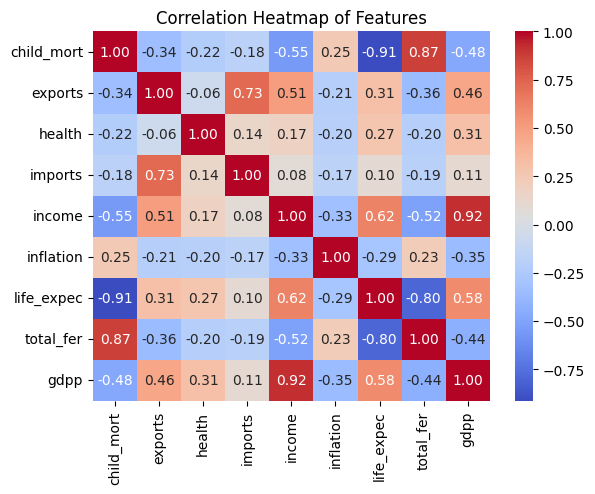

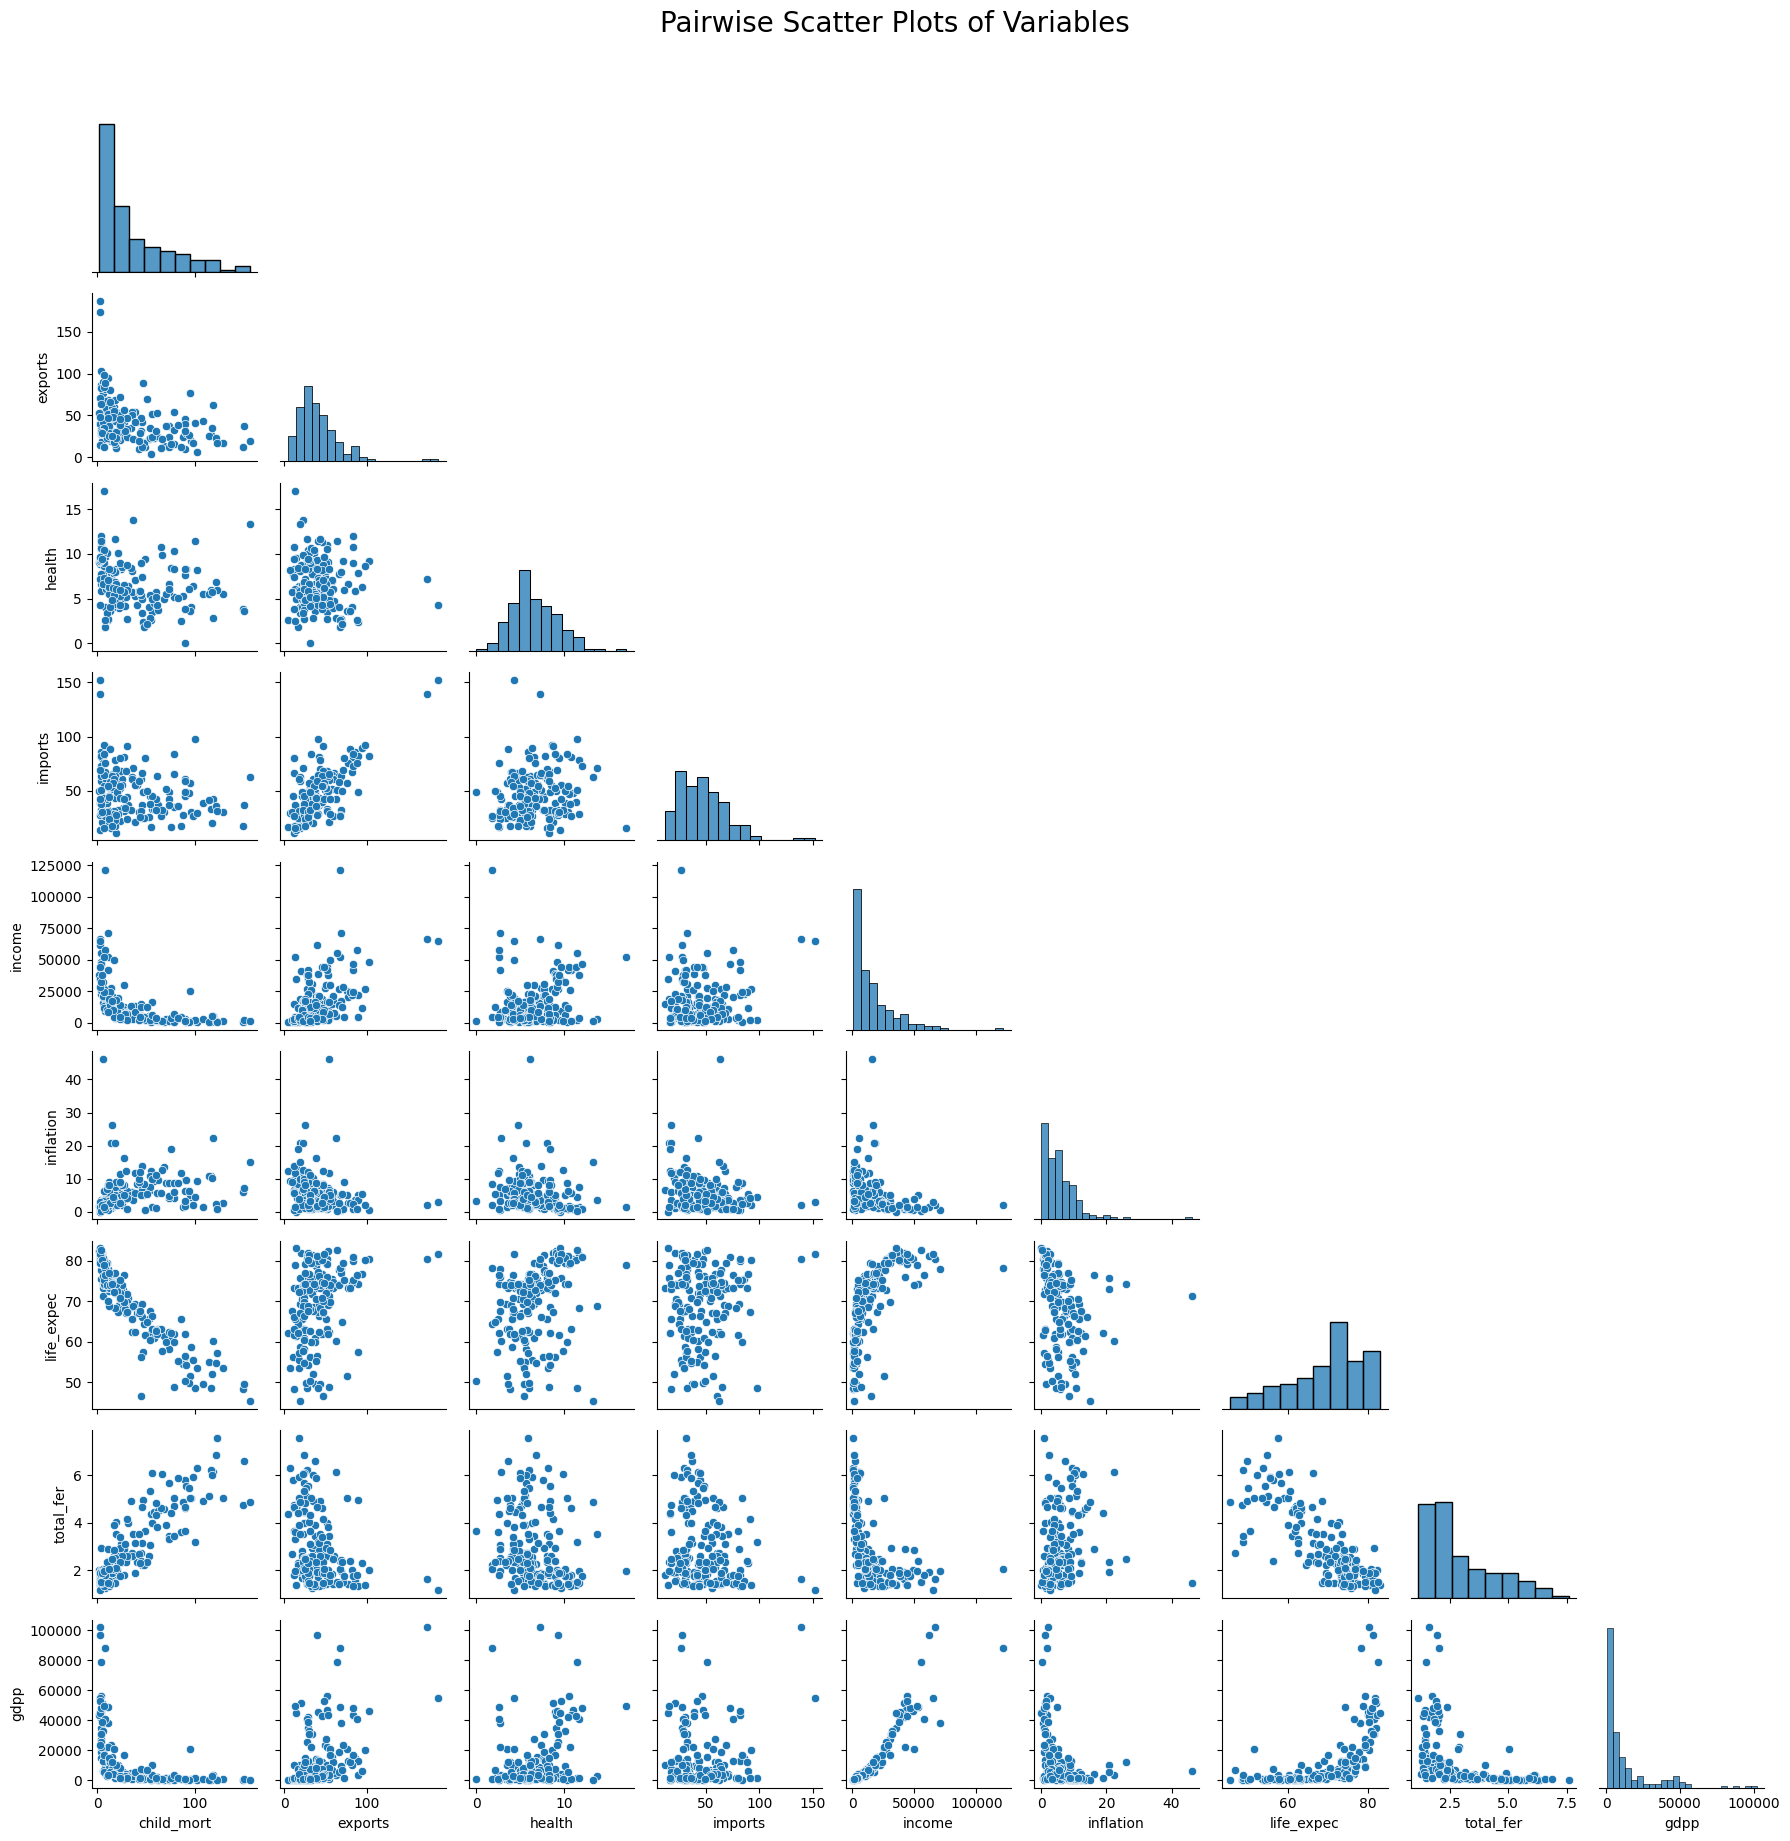

In [104]:
# implementation here
country_df = pd.read_csv("Data/country_data.csv")

# correlation heatmap
correlation_matrix = country_df.corr(numeric_only=True)
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True               
)
plt.title('Correlation Heatmap of Features')
plt.show()

# scatter plots
features = country_df.drop(columns=["country"])
sns.pairplot(features, corner=True, height=2)
plt.suptitle('Pairwise Scatter Plots of Variables', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

***Questions to Answer:***

1. Based on the heatmap highly correlated pairs are ***Income vs. GDPP, Child_Mort vs. Life_Expec, Child_Mort vs. Total_Fer, Total_Fer vs. Life_Expec, Exports vs. Imports***.

When two variables like Income and GDPP are so highly correlated (0.92), they carry redundant information. To simplify our model and improve its performance, we should consider keeping only one variable from highly correlated pairs. In the scatter plot matrix, these correlations will appear as clear patterns and help us visually identify groups of similar countries.

2. There are a few visible clusters. From plots Income vs. Child_Mort and GDPP vs. Child_Mort we can see two groups: countries with ***low GDP, high child mortality, low life expectancy*** and countries with ***high GDP, low child mortality, high life expectancy***. But they are not strongly separated, meaning clustering algorithms may struggle without scaling, transformation, or dimensionality reduction.

  ### Q1.2 Data preprocessing (5p)
  Prepare data for clustering:
  1. Handle missing values (if present)
  2. Decide Decide how to handle outliers (keep, remove, or transform) - **justify your decision**
  3. Apply appropriate scaling/normalization

**Critical Question:**
- Why is feature scaling essential for K-Means ? What would happen if you didn't scale the data?


In [105]:
# implementation here

# imputing missing values
missing_values=country_df.isnull().sum()
print("number of missing values:",missing_values.sum())
if missing_values.sum()>0:
    for col in features.columns:
        median_value = features[col].median()
        features[col] = features[col].fillna(median_value)


# handling outliers
for col in features.columns:
    Q1 = features[col].quantile(0.25)
    Q3 = features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    features[col] = features[col].clip(lower, upper)


# appropriate scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

number of missing values: 0


I choosed **transforming** outliers by using IQR-based clipping. Because it preserves all observations (no data loss),reduces the impact of extreme values and maintains the overall structure of the data better than deletion.

**Answer For the Critical Question:** Feature scaling is essential for K-Means because the algorithm uses distance calculations to form clusters. If the data is not scaled, features with larger values will dominate the distance, and the clustering results will be biased toward those features, leading to incorrect clusters.

### Q2 K-Means Clustering (20p)

### Q2.1 Apply K-Means clustering to the preprocessed data (10p)

1. Use the **Elbow Method** to determine the optimal number of clusters (test k = 2 to 10)
2. Also calculate the **Silhouette Score** for each k value
3. Choose the optimal k value and **justify your choice**
4. Apply K-Means with your chosen k
5. Visualize the clusters (you may use the first 2 PCA components)

**Questions to Answer:**
- What k value did you choose and why? Do the Elbow and Silhouette methods agree?
- What is the limitation of using only 2D visualization for data with 9 features?
- List 3-5 countries from each cluster. Does the grouping make intuitive sense?

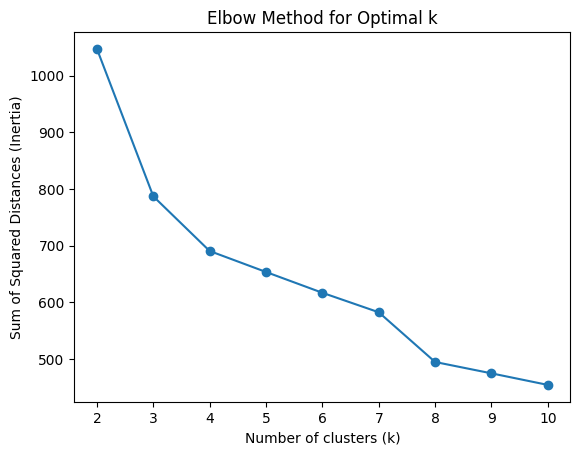

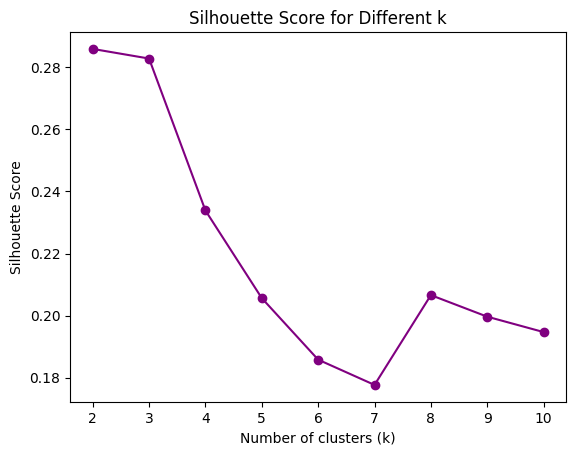

In [106]:
#implementation here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# choosing optimal k
silhouette_scores = []
inertias = [] 

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(score)
    inertias.append(kmeans.inertia_)

# plotting the graph for elbow method
plt.plot(range(2,11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# plotting silhoutte scores
plt.plot(range(2,11), silhouette_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()


According to elbow method and silhouette score graph the ***optimak k is 3***. The decrease in inertia starts to slow down at k=3 in elbow method graph and in silhouette score graph k=3 has one of the highest score.

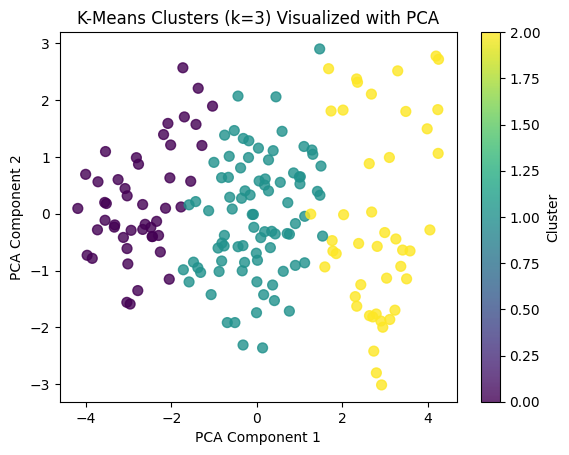

100         Mali
151    Swaziland
97        Malawi
164       Uganda
91       Liberia
Name: country, dtype: object
163              Turkmenistan
1                     Albania
144              South Africa
47                    Ecuador
19     Bosnia and Herzegovina
Name: country, dtype: object
152            Sweden
98           Malaysia
101             Malta
167    United Kingdom
140         Singapore
Name: country, dtype: object


In [107]:
# kMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)
country_df['kMeans_Cluster'] = cluster_labels

# visualizing clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(features_scaled)
plt.scatter(
    features_pca[:, 0], 
    features_pca[:, 1], 
    c=country_df['kMeans_Cluster'],   # cluster labels
    cmap='viridis', 
    s=50, 
    alpha=0.8,
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (k=3) Visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()

print(country_df[country_df['kMeans_Cluster'] == 0]['country'].sample(5, random_state=42))
print(country_df[country_df['kMeans_Cluster'] == 1]['country'].sample(5, random_state=42))
print(country_df[country_df['kMeans_Cluster'] == 2]['country'].sample(5, random_state=42))

***Questions to Answer:***
1. I choose **3** as the optimal k value. While choosing I looked at the point where decrease in inertia starts to slow down in elbow method and looked at the points with highest silhouette scores. And yes, elbow and silhouette methods agreed.

2. The main limitation is that PCA reduces 9-dimensional data into only 2 dimensions. As a result, clusters that appear overlapping in 2D may actually be better separated in the full feature space, so the visualization may not fully reflect the true clustering structure.

3. Yes, the grouping is intuitive. Countries within each cluster share similar economic and health characteristics.

**Cluster 0:** Mali, Swaziland, Uganda, Liberia

This cluster represents less-developed countries.

**Cluster 1:** Turkmenistan, Albania, South Africa, Ecuador

This cluster appears to include middle-income or developing countries.

**Cluster 2:** Sweden, Malaysia, United Kingdom, Singapore

Countries in this cluster are mostly high-income, developed nations with high life expectancy and low child mortality.

## Q2.2 Hierarchical Agglomerative Clustering (10 Points)

Apply Hierarchical Clustering and compare with K-Means:

1. Apply Hierarchical Agglomerative Clustering (HAC) to your scaled data
2. Create a **dendrogram** to visualize the hierarchical structure
3. Based on the dendrogram, determine the optimal number of clusters by identifying where to "cut" the tree
4. Cut the dendrogram at your chosen level and obtain cluster labels
5. Compare the resulting clusters with your K-Means results

**Questions to Answer:**
- Looking at the dendrogram, at what height/distance would you cut to get meaningful clusters? Why?
- Does the hierarchical structure suggest the same number of clusters as K-Means?
- How similar are the HAC clusters to the K-Means clusters? Do the same countries tend to be grouped together?

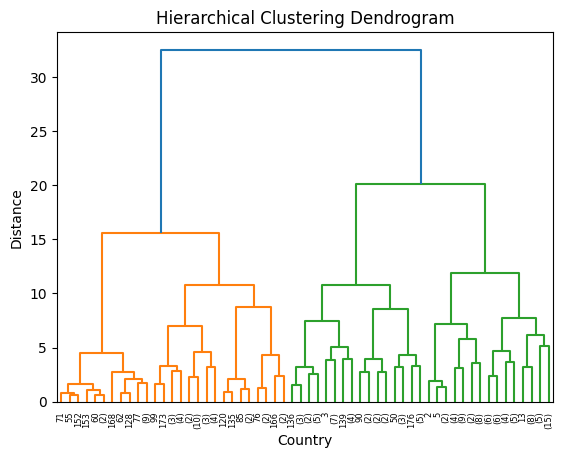

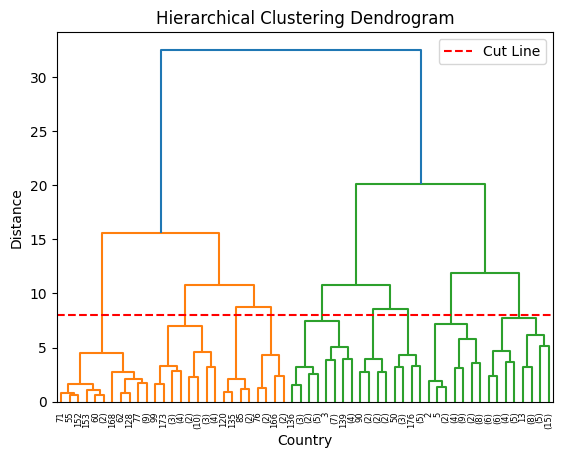

HAC_Cluster,0,1,2
kMeans_Cluster,,,
0,0,11,36
1,15,65,5
2,44,1,0


In [108]:
# implementation here
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage matrix
link = linkage(features_scaled, method="ward")

# creating dendrogram
dendrogram(link, truncate_mode='level', p=5, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

# after deciding where to cut
dendrogram(link, truncate_mode='level', p=5, show_leaf_counts=True) 
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Country') 
plt.ylabel('Distance') 
plt.axhline(y=8, color='r', linestyle='--', label='Cut Line')  # cutting at height 8
plt.legend() 
plt.show()

# applying HAC
# choosing n_clusters=3 based on the dendrogram
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(features_scaled)
country_df["HAC_Cluster"] = hac_labels

# comparing kmeans cluster with HAC cluster
pd.crosstab(country_df["kMeans_Cluster"], country_df["HAC_Cluster"])

By looking at the crosstable we can say that K-Means Cluster 0 mostly matches HAC Cluster 2,    K-Means Cluster 1 mostly matches HAC Cluster 1 and  K-Means Cluster 2 mostly matches HAC Cluster 0. This shows a near one-to-one correspondence between methods.

***Questions to Answer:***

1. I cut the dendogram at height **8** where there is a noticeable jump in distance before large clusters merge. Below this height, merges happen frequently and above this height, clusters combine clearly distinct groups.

2. Hierarchical clustering suggest **3 clusters** as in K-Means method, means there is a consistency between the two methods.

3. The HAC and K-Means results are mostly consistent but cluster labels differ. Most points from each K-Means cluster fall into one dominant HAC cluster. Differences occur mainly for borderline countries, which are sensitive to the clustering method.

### Q3 Dimensionality Reduction with PCA (20p)

## 3.1 Applying PCA (10 Points)

Apply PCA to understand the underlying structure of the data:

1. Apply PCA to the scaled data (use all components initially)
2. Determine how many components are needed to explain at least **80%** and **95%** of the variance
3. Visualize the data using the first two principal components (scatter plot)

**Questions to Answer:**
- Do you see any natural groupings in the 2D PCA visualization?

Components needed for 80% variance: 4
Components needed for 95% variance: 5


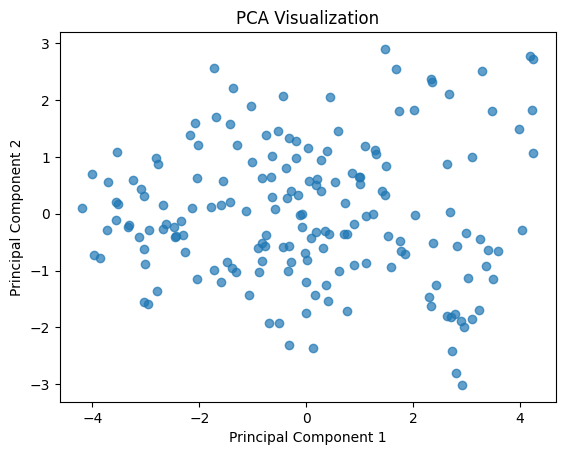

In [109]:
# implementation here

# applying PCA initially with all components
pca = PCA()
pca_components = pca.fit_transform(features_scaled)

# determining components for 80% and 95% variance
variance = np.cumsum(pca.explained_variance_ratio_)
components_80 = np.argmax(variance >= 0.80) + 1
components_95 = np.argmax(variance >= 0.95) + 1
print("Components needed for 80% variance:", components_80)
print("Components needed for 95% variance:", components_95)

# applying PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
pca_results = pca_2.fit_transform(features_scaled)
plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

***Questions to Answer:***

1. The 2D PCA visualization does not show clearly separated natural groupings. The data points form overlapping regions, suggesting that the underlying structure is continuous rather than consisting of distinct clusters.

## 3.2 K-Means Clustering with PCA (10 Points)

Apply K-Means to the PCA-reduced data:

1. Select the number of principal components based on your analysis in 3.1
2. Apply the Elbow Method and Silhouette Score on the PCA-reduced data
3. Determine the optimal k and apply K-Means
4. Visualize the clusters in the PCA space

**Questions to Answer:**
- Is the optimal k the same as before PCA? If different, why might this be?
- Are the clusters more or less separable in the PCA space?

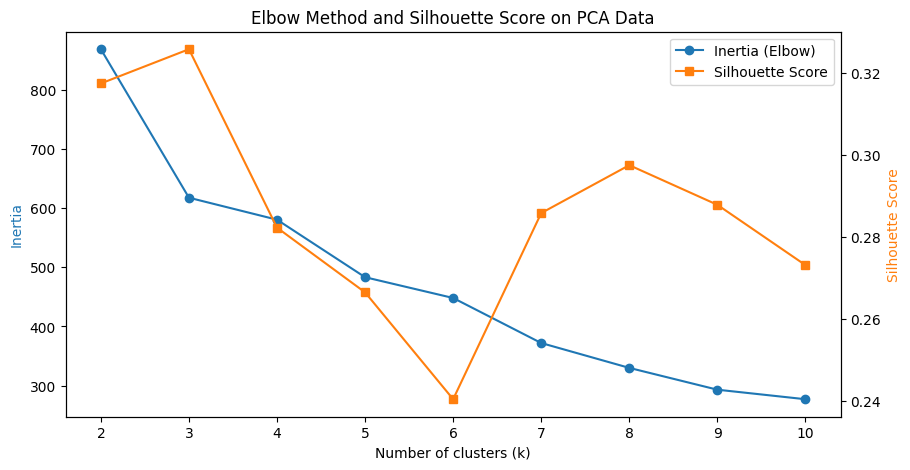

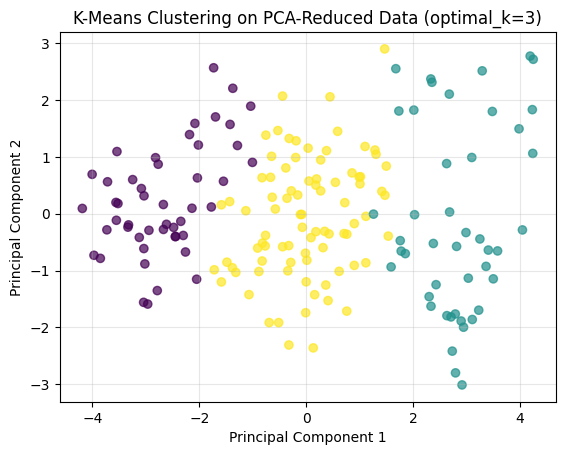

In [110]:
# implementation here

# choosing number of components explaining ≥ 80% variance
pca_reduced = PCA(n_components=components_80)
features_pca = pca_reduced.fit_transform(features_scaled)

# applying elbow method and silhouette score on PCA-reduced data
wcss = []
silhouette = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_pca)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features_pca, labels))

# plotting elbow and silhoutte results
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(range(2,11), wcss, marker='o', label='Inertia (Elbow)')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(range(2,11), silhouette, marker='s', color='tab:orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='tab:orange')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
plt.title('Elbow Method and Silhouette Score on PCA Data')
plt.show()

# choosing optimal k and applying k-means
optimal_k_pca = 3   # according to elbow and silhouette results
final_kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = final_kmeans_pca.fit_predict(features_pca)
country_df["KMeans_PCA_Cluster"] = pca_labels

# visualizing clusters in PCA space
plt.scatter(
    features_pca[:, 0],
    features_pca[:, 1],
    c=pca_labels,
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data (optimal_k=3)")
plt.grid(True, alpha=0.3)
plt.show()

***Questions to Answer:***

1. The optimal number of clusters after PCA remains k = 3, which is consistent with the result obtained before PCA. This indicates that the main structure of the data is preserved after dimensionality reduction.

2. The clusters appear more seperable but still partially overlapping in the PCA space. While PCA helps concentrate the variance into fewer dimensions and can improve visualization, the clusters are not perfectly separable.

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw4.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.